
# Partie 1 : Classification de la tuberculose

Les données ont été divisées en un ensemble de test et d'apprentissage.  

L'ensemble de formation, sur lequel vous entraînerez vos modèles, contient :
- 353 images de radiographies de poumons tuberculeux positifs 
- 365 images de radiographies de poumons sains
  
L'ensemble de test contient 82 images.

Il vous est demandé de créer un modèle d'apprentissage automatique pour prédire la probabilité que le poumon de la radiographie soit tuberculeux.  
  
  
Dans votre dossier de soumission, **LABEL = 1 signifie que la radiographie est TB positive**.  

Veuillez conserver vos valeurs sous forme de probabilités.

### Runmila AI Institute & minoHealth AI Labs Tuberculosis Classification via X-Rays Challenge

This competition is hosted on Zindi and can be accessed here https://zindi.africa/competitions/runmila-ai-institute-minohealth-ai-labs-tuberculosis-classification-via-x-rays-challenge. The objective of the challenge is to build a model that can classify Tuberculosis and Normal X-Ray results.

### 1. Importing libraries

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import InceptionV3, VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from IPython.display import Image

In [ ]:
#seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_file = "train"

### 2. Load data

In [ ]:
#reading data
#Change path to your images and csv files path 
os.getcwd()
train_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/cnn classif breast cancer/BC_train.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/cnn classif breast cancer/BC_test.xlsx')
train_path = '/content/drive/MyDrive/Colab Notebooks/cnn classif breast cancer/BreaKHis 400X/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/cnn classif breast cancer/BreaKHis 400X/test'

In [ ]:
train_data

,Files,Label,Path
0,SOB_M_DC-14-10926-400-002.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...
1,SOB_M_DC-14-10926-400-003.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...
2,SOB_M_DC-14-10926-400-006.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...
3,SOB_M_DC-14-10926-400-007.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...
4,SOB_M_DC-14-10926-400-008.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...
...,...,...,...
1143,SOB_B_TA-14-3411F-400-011.png,0,./BreaKHis 400X/train/benignSOB_B_TA-14-3411F-...
1144,SOB_B_TA-14-3411F-400-014.png,0,./BreaKHis 400X/train/benignSOB_B_TA-14-3411F-...
1145,SOB_B_TA-14-3411F-400-015.png,0,./BreaKHis 400X/train/benignSOB_B_TA-14-3411F-...
1146,SOB_B_TA-14-3411F-400-016.png,0,./BreaKHis 400X/train/benignSOB_B_TA-14-3411F-...


In [ ]:
test_data

,Files,Label,Path
0,SOB_M_DC-14-10926-400-004.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1092...
1,SOB_M_DC-14-10926-400-005.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1092...
2,SOB_M_DC-14-11031-400-003.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1103...
3,SOB_M_DC-14-11031-400-005.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1103...
4,SOB_M_DC-14-11031-400-006.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1103...
...,...,...,...
540,SOB_B_TA-14-21978AB-400-007.png,0,./BreaKHis 400X/test/benignSOB_B_TA-14-21978AB...
541,SOB_B_TA-14-3411F-400-004.png,0,./BreaKHis 400X/test/benignSOB_B_TA-14-3411F-4...
542,SOB_B_TA-14-3411F-400-006.png,0,./BreaKHis 400X/test/benignSOB_B_TA-14-3411F-4...
543,SOB_B_TA-14-3411F-400-012.png,0,./BreaKHis 400X/test/benignSOB_B_TA-14-3411F-4...


In [ ]:
myList = [] # creating an empty list

for i in range(1148):
    myList.append(i)

train_data["ID"] = myList

In [ ]:
myList_test = [] # creating an empty list
d = 1148
for i in range(545):
    myList_test.append(i + d)

test_data["ID"] = myList_test

In [ ]:
train_data

,Files,Label,Path,ID
0,SOB_M_DC-14-10926-400-002.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...,0
1,SOB_M_DC-14-10926-400-003.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...,1
2,SOB_M_DC-14-10926-400-006.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...,2
3,SOB_M_DC-14-10926-400-007.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...,3
4,SOB_M_DC-14-10926-400-008.png,1,./BreaKHis 400X/train/malignantSOB_M_DC-14-109...,4
...,...,...,...,...
1143,SOB_B_TA-14-3411F-400-011.png,0,./BreaKHis 400X/train/benignSOB_B_TA-14-3411F-...,1143
1144,SOB_B_TA-14-3411F-400-014.png,0,./BreaKHis 400X/train/benignSOB_B_TA-14-3411F-...,1144
1145,SOB_B_TA-14-3411F-400-015.png,0,./BreaKHis 400X/train/benignSOB_B_TA-14-3411F-...,1145
1146,SOB_B_TA-14-3411F-400-016.png,0,./BreaKHis 400X/train/benignSOB_B_TA-14-3411F-...,1146


In [ ]:
test_data

,Files,Label,Path,ID
0,SOB_M_DC-14-10926-400-004.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1092...,1148
1,SOB_M_DC-14-10926-400-005.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1092...,1149
2,SOB_M_DC-14-11031-400-003.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1103...,1150
3,SOB_M_DC-14-11031-400-005.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1103...,1151
4,SOB_M_DC-14-11031-400-006.png,1,./BreaKHis 400X/test/malignantSOB_M_DC-14-1103...,1152
...,...,...,...,...
540,SOB_B_TA-14-21978AB-400-007.png,0,./BreaKHis 400X/test/benignSOB_B_TA-14-21978AB...,1688
541,SOB_B_TA-14-3411F-400-004.png,0,./BreaKHis 400X/test/benignSOB_B_TA-14-3411F-4...,1689
542,SOB_B_TA-14-3411F-400-006.png,0,./BreaKHis 400X/test/benignSOB_B_TA-14-3411F-4...,1690
543,SOB_B_TA-14-3411F-400-012.png,0,./BreaKHis 400X/test/benignSOB_B_TA-14-3411F-4...,1691


In [ ]:
train_file_name = train_data['Files']
train_labels = np.asarray(train_data['Label'].values)
train_dict = {'Path': train_path + '/' + train_file_name,'Label': train_labels}
train = pd.DataFrame(data=train_dict)


In [ ]:
#creating train and test dataframe
#we will create dataframes and use keras Image data preprocessing function: flow_from_dataframe

# train


train['ID'] = train_data['ID']
train['Label'] = train.Label.apply(lambda x: 'Positive' if x == 1 else 'Normal')

# test

test_file_name = test_data['Files']
test_labels = np.asarray(test_data['Label'].values)
test_dict = {'Path': test_path + '/' + test_file_name ,'Label': test_labels}
test = pd.DataFrame(data=test_dict)
test['ID'] = test_data['ID']
test['Label'] = test.Label.apply(lambda x: 'Positive' if x == 1 else 'Normal')
test

,Path,Label,ID
0,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1148
1,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1149
2,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1150
3,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1151
4,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1152
...,...,...,...
540,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Normal,1688
541,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Normal,1689
542,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Normal,1690
543,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Normal,1691


In [ ]:
#train['filepath'] = train['filepath'].replace({'train':'./train/'}, regex= True)

In [ ]:
train.head()

,Path,Label,ID
0,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,0
1,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1
2,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,2
3,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,3
4,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,4


In [ ]:
test.head()

,Path,Label,ID
0,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1148
1,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1149
2,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1150
3,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1151
4,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,1152


In [ ]:
train.shape, test.shape

((1148, 3), (545, 3))

### 3. EDA and Preprocessing

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


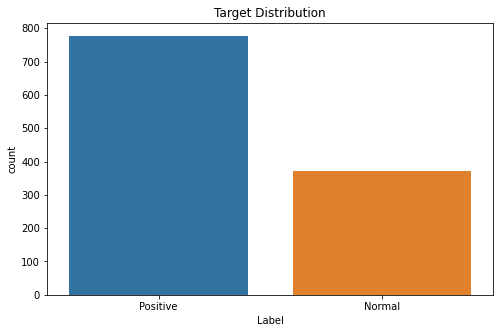

In [ ]:
#visualizing target distribution 
f, ax = plt.subplots(1,1, figsize=(8,5))
sns.countplot(train['Label'],order = train['Label'].value_counts().index)
plt.title("Target Distribution")
plt.show()

In [ ]:
#we can see that our dataset is balanced with almost equal number of samples in each class
train.Label.value_counts()/len(train)

Positive    0.676829
Normal      0.323171
Name: Label, dtype: float64

#visualizing random images
nrows = 3
rands = np.random.randint(train.shape[0], size=nrows**2)
fig = plt.figure(figsize=(12,10))

for i in range(nrows**2):
    img = cv2.imread(train.loc[rands[i], 'filepath'])
    ax = plt.subplot(nrows, nrows, i+1)
    plt.imshow(img)
    plt.title(train.loc[rands[i], 'LABEL'])
plt.show()

# Rappel Split Train / Validation


Nous allons comme d'habitude commencer par la préparation des jeux de données permettant d'entrainer notre réseau.

Pour celà nous allons splitter dans un ratio 80/20% les images permettant l'apprentissage et les images permettant la validation.

Le modèle va donc apprendre sur le jeu d'entrainement puis valider les prédictions sur le jeu de validation. A noter que ces deux jeux de données sont labellisés : c'est à dire que l'on connait les classes auquelles appartiennent les images

Le schéma suivant donne une illustration de la répartition entre le jeu d'entrainement et le jeu de validation:

In [ ]:
Image("img/split.png")

In [ ]:
#lets split our training data into train and validation set
#We have 574 training samples and i will use 80% train and 20% validation  
df_train = train[:574]
df_val = train[574:]
print(df_train.Label.value_counts())
print(df_val.Label.value_counts())

Positive    574
Name: Label, dtype: int64
Normal      371
Positive    203
Name: Label, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
# couper le dataset en 2 parties (Train / Test)
#df = train.copy()
df_train, df_test = train_test_split(train, test_size=0.20, random_state=101)

print(df_train.shape)
print(df_test.shape)

(918, 3)
(230, 3)


In [ ]:
print(df_train.Label.value_counts())


Positive    613
Normal      305
Name: Label, dtype: int64


In [ ]:
df_train

,Path,Label,ID
336,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,336
1025,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Normal,1025
978,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Normal,978
1075,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Normal,1075
68,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,68
...,...,...,...
575,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,575
973,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Normal,973
75,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,75
599,/content/drive/MyDrive/Colab Notebooks/cnn cla...,Positive,599


In [ ]:
df_train['Path'][1]

'/content/drive/MyDrive/Colab Notebooks/cnn classif breast cancer/BreaKHis 400X/train/SOB_M_DC-14-10926-400-003.png'

In [ ]:
#data generators
batch_size = 32  
image_size = (700, 460)
learning_rate = 0.0001
y_col="Label",

train_steps = np.ceil(len(df_train) / batch_size)
val_steps = np.ceil(len(df_val) / batch_size )

classes = train.Label.unique().tolist()

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True,
                             vertical_flip=True,shear_range=10,zoom_range=0.2,width_shift_range=0.1,
                             height_shift_range=0.1,channel_shift_range=10.)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_datagen.flow_from_dataframe(df_train,x_col='Path', y_col='Label',
                                        target_size=image_size,classes=classes,
                                        batch_size=batch_size,
                                        class_mode='categorical', shuffle=True, seed=SEED)

val_ds = val_datagen.flow_from_dataframe(df_val,x_col='Path', y_col='Label',
                                        target_size=image_size,classes=classes,
                                        batch_size=batch_size,
                                        class_mode='categorical', shuffle=False, seed=SEED)

test_ds = val_datagen.flow_from_dataframe(test, x_col='Path',target_size=image_size, class_mode=None,
                                          shuffle=False,batch_size=batch_size)#set shuffle=False for test dataset not be shuffled

Found 918 validated image filenames belonging to 2 classes.
Found 574 validated image filenames belonging to 2 classes.
Found 545 validated image filenames.


### 4. Model building

# Utilisation de l'apprentissage par transfert (VGG16) pour améliorer la précision

    VGG16 est une architecture CNN qui a été la première finaliste du Défi ImageNet 2014. 
    Il est conçu par le Visual Graphics Group d'Oxford et comporte 16 couches au total, avec 13 couches convolutives elles-mêmes. 
    Nous chargerons les poids pré-entraînés de ce modèle afin de pouvoir utiliser les fonctionnalités utiles que ce modèle a apprises pour notre tâche.


In [ ]:
Image("img/VGG16 architecture.png")

In [ ]:
#we will use transfer learning from VGG16 model
#
def BuildModel (pretrained=VGG16):

    base_model = pretrained(include_top=False, weights='imagenet', input_shape=(700, 460,3)) #include_top=False to remove the last layer 
#Alors, commençons par charger les poids du modèle:
    for layer in base_model.layers:
        layer.trainable = False   #freeze trainable layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.1)(x)
    x = BatchNormalization()(x)
    x = Dense(3072, activation='relu', )(x)
    x = Dropout(0.3)(x)
    x = BatchNormalization()(x)
    output = Dense(2, activation='sigmoid')(x) 
    
    model = Model(base_model.input, output)
    
    return model

In [ ]:
model = BuildModel()

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
#compile model
optimizer = keras.optimizers.Adam(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['AUC'])

In [ ]:
#callbacks
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
chkpt_path = os.path.join("Runmila_AI_Institute_Challenge/models/", f"tb_model.h5", )
checkpoint = ModelCheckpoint(chkpt_path, monitor='val_loss',mode='auto', verbose=1, save_best_only=True,)

In [ ]:

#fit model
history = model.fit(train_ds, epochs=15,steps_per_epoch=train_steps, callbacks=[earlystop, checkpoint], verbose=1, shuffle=False, validation_data=(val_ds), validation_steps= val_steps)

Epoch 1/15
17/29 [================>.............] - ETA: 1:58 - loss: 0.7243 - auc: 0.6593

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
#AUC
y_pred = model.predict(val_ds, verbose=1)[:, 1] 
fpr, tpr, thresholds = roc_curve(val_ds.classes, y_pred)
auc = auc(fpr, tpr)
auc

In [ ]:

## plotting AUC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
history.history['auc']

In [ ]:
# On plot le train and val curve

auc = history.history['auc']
val_auc = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(auc) + 1)

#Train and validation accuracy
plt.plot(epochs, auc, 'b', label='Training accurarcy')
plt.plot(epochs, val_auc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### 5. Submission

In [ ]:
#make predictions on test data
predictions = model.predict(test_ds)[:, 1]

In [ ]:
submission = pd.DataFrame()
submission['ID'] = test['ID']
submission['LABEL'] = predictions

In [ ]:
submission

submission.to_csv('starter1.csv', index=False)

In [ ]:
 history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

In [ ]:

history_df = pd.DataFrame(history.history)
history_df[['auc', 'val_auc']].plot()

In [ ]:
predictions2 = model.predict(train_ds)

In [ ]:
result = pd.DataFrame(predictions2)
result = result.rename(columns={0: 'predictions'})
result["Valeurs réel"] = test_data['Label']

result